In [1]:
from linares_plot import *

In [2]:
df=pd.read_csv('C:\\Users\\David\\Desktop\\Pias\\titanic.csv')

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


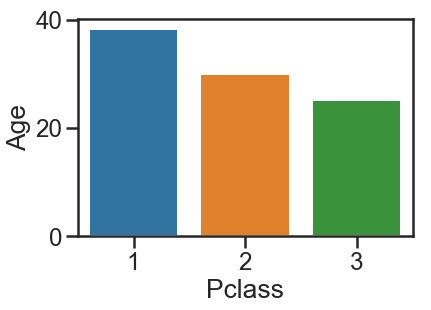

In [4]:
sns.barplot(x='Pclass', y='Age', ci=0, data=df)
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


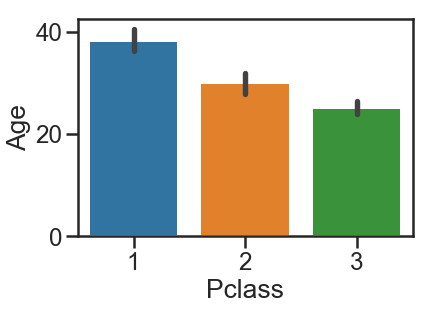

In [5]:
sns.barplot(x='Pclass', y='Age', ci=95, data=df)
plt.show()

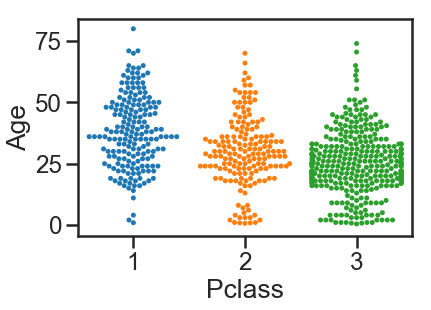

In [6]:
sns.swarmplot(x='Pclass', y='Age', data=df)
plt.show()

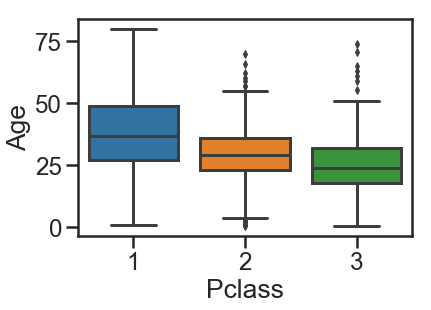

In [7]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


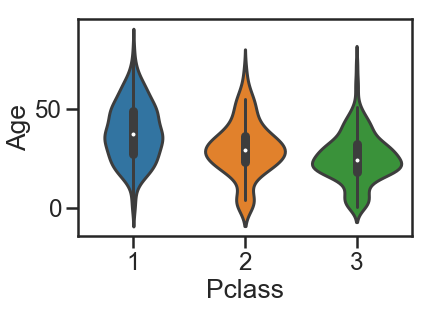

In [8]:
sns.violinplot(x='Pclass', y='Age', ci=95, data=df)
plt.show()

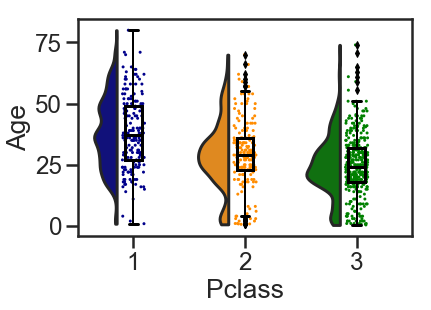

In [9]:
import ptitprince as pt

dx='Pclass'
dy='Age'
pal= ['darkblue', 'darkorange', 'green']
ort=0

ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)


C:\Users\David\Documents\GitHub\funciones\linares_plot.py:124: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  ci= bootstraps.ci(df.groupby(x).get_group(x_idx)[y], statfunction=statistic, n_samples=reps,  alpha=1-CI)    # calculate the bootstrap (data no subject base)
C:\Users\David\Documents\GitHub\funciones\linares_plot.py:124: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  ci= bootstraps.ci(df.groupby(x).get_group(x_idx)[y], statfunction=statistic, n_samples=reps,  alpha=1-CI)    # calculate the bootstrap (data no subject base)
C:\Users\David\Documents\GitHub\funciones\linares_plot.py:124: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  ci= bootstraps.ci(df.groupby(x).get_group(x_idx)[y], statfunction=statistic, n_samples=reps,  alpha=1-CI)    # calculate the bootstrap (data no subject base)


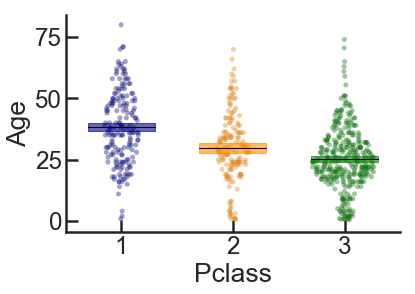

In [10]:
df2 = df[~df.Age.isnull()]

linares_plot(x='Pclass', y='Age', order=[1,2,3], df=df2, 
             alpha_box=0.6,reps=100, fill_box=True, sep_axis=False,
             point_size=5, palette=['darkblue', 'darkorange', 'green'])

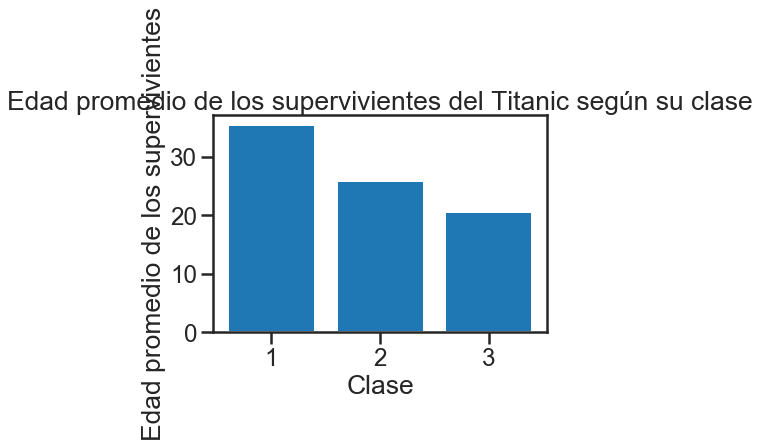

In [11]:
## Chat GPT

import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic
titanic_data = df

# Agrupar los datos por clase y calcular la edad promedio de los supervivientes
survived_by_class = titanic_data[titanic_data['Survived'] == 1].groupby('Pclass')['Age'].mean()

# Crear un gráfico de barras
plt.bar(survived_by_class.index, survived_by_class.values)

# Etiquetar los ejes y agregar un título
plt.xlabel('Clase')
plt.ylabel('Edad promedio de los supervivientes')
plt.title('Edad promedio de los supervivientes del Titanic según su clase')

# Mostrar el gráfico
plt.show()


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic
titanic_data = df

# Agrupar los datos por clase y calcular la edad promedio y el error estándar de los supervivientes
survived_by_class = titanic_data[titanic_data['Survived'] == 1].groupby('Pclass')['Age'].agg(['mean', 'sem'])
class_labels = ['1ra', '2da', '3ra']

# Calcular los límites superior e inferior del intervalo de confianza del 95%
yerr = 1.96 * survived_by_class['sem'].values

# Crear un gráfico de barras
fig, ax = plt.subplots()
bars = ax.bar(np.arange(len(class_labels)), survived_by_class['mean'].values, yerr=yerr, capsize=10, color=['#008fd5', '#fc4f30', '#6d904f'])

# Etiquetar los ejes y agregar un título
ax.set_xticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, fontsize=12)
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad promedio de los supervivientes', fontsize=14)
ax.set_title('Edad promedio de los supervivientes del Titanic según su clase', fontsize=16)

# Añadir etiquetas de valor encima de cada barra
for i, v in enumerate(survived_by_class['mean'].values):
    ax.text(i, v + 1, f"{v:.1f}", ha='center', fontsize=12)

# Mostrar el gráfico
plt.show()


SyntaxError: invalid syntax (<ipython-input-13-ad8a9a27f6fb>, line 28)

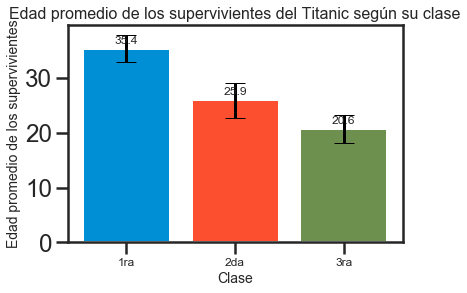

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic
titanic_data = df

# Agrupar los datos por clase y calcular la edad promedio y el error estándar de los supervivientes
survived_by_class = titanic_data[titanic_data['Survived'] == 1].groupby('Pclass')['Age'].agg(['mean', 'sem'])
class_labels = ['1ra', '2da', '3ra']

# Calcular los límites superior e inferior del intervalo de confianza del 95%
yerr = 1.96 * survived_by_class['sem'].values

# Crear un gráfico de barras
fig, ax = plt.subplots()
bars = ax.bar(np.arange(len(class_labels)), survived_by_class['mean'].values, yerr=yerr, capsize=10, color=['#008fd5', '#fc4f30', '#6d904f'])

# Etiquetar los ejes y agregar un título
ax.set_xticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, fontsize=12)
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad promedio de los supervivientes', fontsize=14)
ax.set_title('Edad promedio de los supervivientes del Titanic según su clase', fontsize=16)

# Añadir etiquetas de valor encima de cada barra
for i, v in enumerate(survived_by_class['mean'].values):
    ax.text(i, v + 1, "{:.1f}".format(v), ha='center', fontsize=12)

# Mostrar el gráfico
plt.show()


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


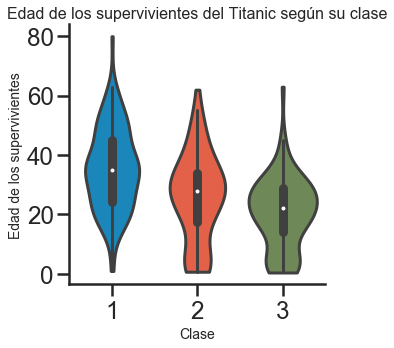

In [15]:

# Filtrar los supervivientes por clase
survived_by_class = titanic_data[titanic_data['Survived'] == 1][['Age', 'Pclass']]

# Crear una gráfica combinando una caja y un sinaplot
sns.catplot(data=survived_by_class, x='Pclass', y='Age', kind='violin', inner='box', palette=['#008fd5', '#fc4f30', '#6d904f'], cut=0)

# Etiquetar los ejes y agregar un título
plt.xlabel('Clase', fontsize=14)
plt.ylabel('Edad de los supervivientes', fontsize=14)
plt.title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Mostrar el gráfico
plt.show()

KeyError: 0

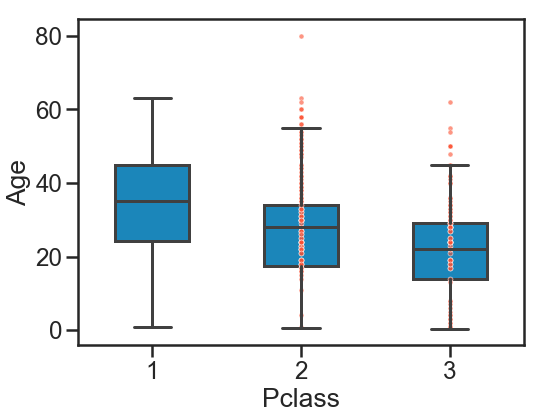

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic
titanic_data =df2

# Filtrar los supervivientes por clase
survived_by_class = titanic_data[titanic_data['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95%
ci_low = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() - 1.96 * x.sem())
ci_high = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem())

# Crear una gráfica combinando una caja y un scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=survived_by_class, x='Pclass', y='Age', color='#008fd5', ax=ax, showfliers=False, width=0.5)
sns.scatterplot(data=survived_by_class, x='Pclass', y='Age', color='#fc4f30', ax=ax, s=25, alpha=0.6)

# Agregar los límites del intervalo de confianza
for i, class_label in enumerate(['1ra', '2da', '3ra']):
    ax.axhspan(ci_low[i], ci_high[i], alpha=0.2, color='#6d904f')

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Mostrar el gráfico
plt.show()


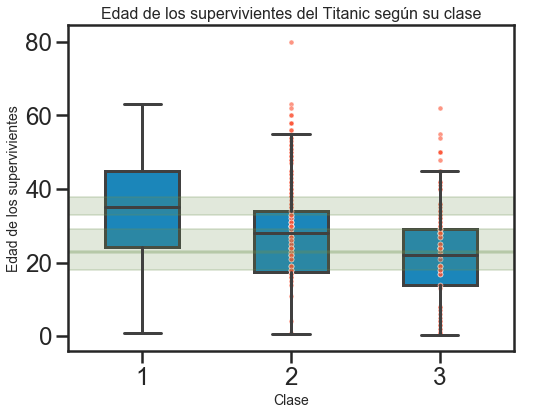

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic
titanic_data = df

# Filtrar los supervivientes por clase
survived_by_class = titanic_data[titanic_data['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95%
ci_low = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() - 1.96 * x.sem())
ci_high = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem())

# Crear una gráfica combinando una caja y un scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=survived_by_class, x='Pclass', y='Age', color='#008fd5', ax=ax, showfliers=False, width=0.5)
sns.scatterplot(data=survived_by_class, x='Pclass', y='Age', color='#fc4f30', ax=ax, s=25, alpha=0.6)

# Agregar los límites del intervalo de confianza
class_indices = {'1ra': 0, '2da': 1, '3ra': 2}
for class_label, ci_l, ci_h in zip(['1ra', '2da', '3ra'], ci_low, ci_high):
    ax.axhspan(ci_l, ci_h, alpha=0.2, color='#6d904f')

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Mostrar el gráfico
plt.show()


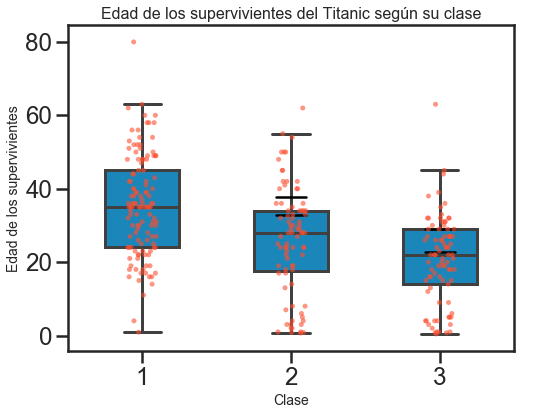

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic
titanic_data = df

# Filtrar los supervivientes por clase
survived_by_class = titanic_data[titanic_data['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica combinando una caja y un scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=survived_by_class, x='Pclass', y='Age', color='#008fd5', ax=ax, showfliers=False, width=0.5)
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', color='#fc4f30', ax=ax, s=5, alpha=0.6)

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i + 1
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color='k')
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color='k')

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Mostrar el gráfico
plt.show()


No handles with labels found to put in legend.


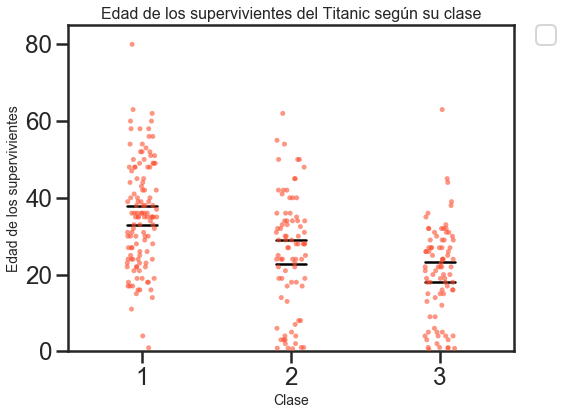

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
#df = pd.read_csv("titanic_data.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de scatter plot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', color='#fc4f30', ax=ax, s=5, alpha=0.6)

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color='k')
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color='k')

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Mostrar el gráfico
plt.show()


No handles with labels found to put in legend.


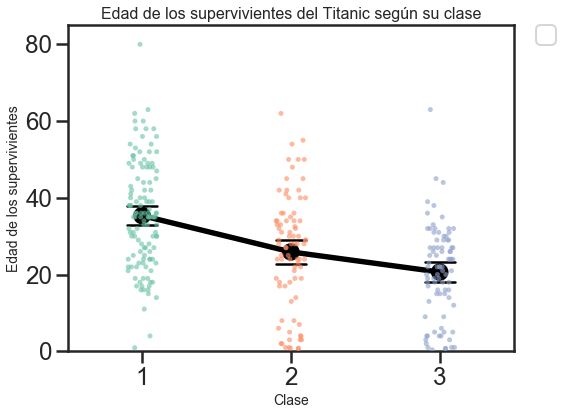

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
#df = pd.read_csv("titanic_data.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de scatter plot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, s=5, alpha=0.6)

# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='black', markersize=10, ax=ax, ci=None)

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color='k')
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color='k')

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Mostrar el gráfico
plt.show()


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


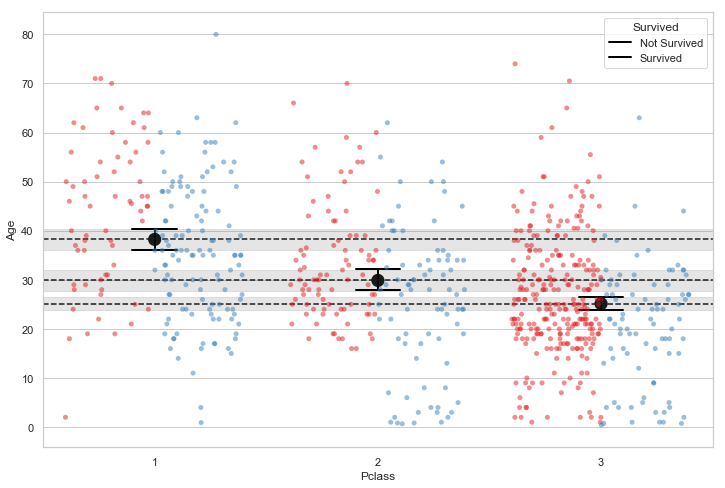

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\David\\Desktop\\Pias\\titanic.csv')

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))

sns.stripplot(x="Pclass", y="Age", data=df, hue='Survived', dodge=True, alpha=0.5, jitter=0.4, palette='Set1')
sns.pointplot(x="Pclass", y="Age", data=df, color='black', markers='o', linestyles='-', ci=95, errwidth=2, capsize=0.2, join=False, scale=1.5)

for i, cls in enumerate(df['Pclass'].unique()):
    cls_data = df[df['Pclass'] == cls]['Age'].dropna()
    conf_int = cls_data.sem() * 1.96
    ax.axhline(cls_data.mean(), color='k', linestyle='--')
    ax.axhspan(cls_data.mean() - conf_int, cls_data.mean() + conf_int, color='grey', alpha=0.2)
    
plt.legend(loc='best', title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


No handles with labels found to put in legend.


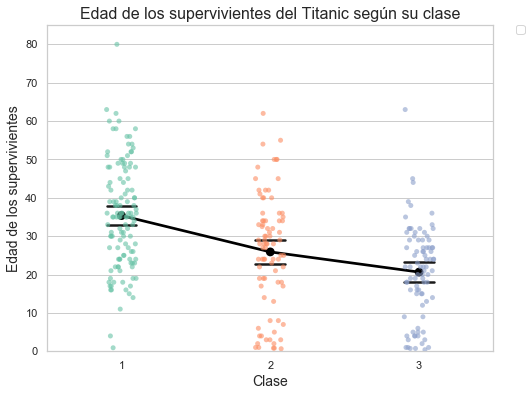

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv("C:\\Users\\David\\Desktop\\Pias\\titanic.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de scatter plot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, s=5, alpha=0.6)

# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='black', markersize=10, ax=ax, ci=None)

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color='k')
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color='k')

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Mostrar el gráfico
plt.show()



No handles with labels found to put in legend.


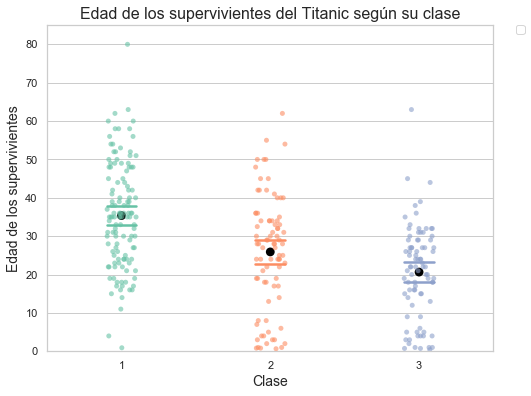

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv("C:\\Users\\David\\Desktop\\Pias\\titanic.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de scatter plot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, s=5, alpha=0.6)

# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='black', markers='o', linestyles='', dodge=True, join=False, ci=None, ax=ax)

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    color = sns.color_palette('Set2')[i]
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color=color)
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color=color)

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Mostrar el gráfico
plt.show()


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv("titanic_data.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de scatter plot para mostrar los datos y los límites del intervalo de confianza
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, s=5, alpha=0.6)

# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='tab:blue', markersize=10, ax=ax, ci=None)

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Mostrar el gráfico
plt.show()


FileNotFoundError: [Errno 2] File b'titanic_data.csv' does not exist: b'titanic_data.csv'

No handles with labels found to put in legend.


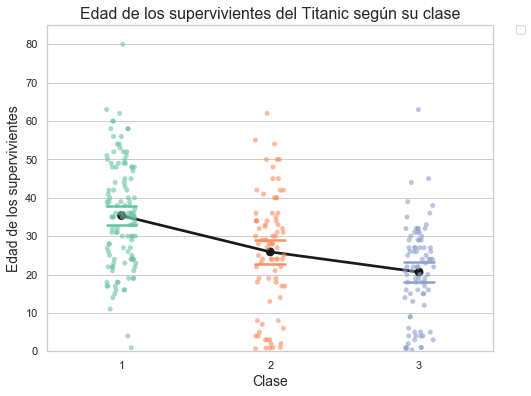

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv('C:\\Users\\David\\Desktop\\Pias\\titanic.csv')

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de scatter plot para mostrar los datos y los límites del intervalo de confianza
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, s=5, alpha=0.6)

# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='k', markers='o', ax=ax, ci=None)

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Mostrar el gráfico
plt.show()


No handles with labels found to put in legend.


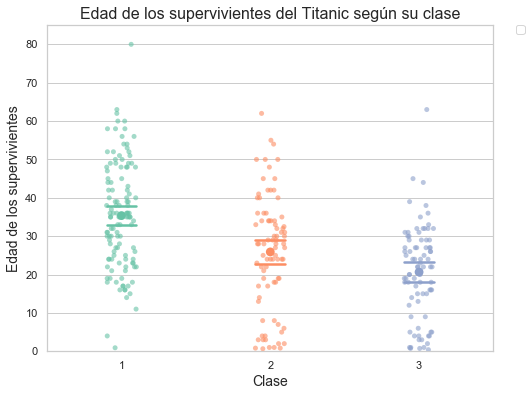

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv("C:\\Users\\David\\Desktop\\Pias\\titanic.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de scatter plot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, s=5, alpha=0.6)

# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='black', markersize=10, ax=ax, ci=None, join=False, palette='Set2')

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Configurar el fondo de la gráfica como blanco
sns.set_style("whitegrid")

# Mostrar el gráfico
plt.show()


No handles with labels found to put in legend.


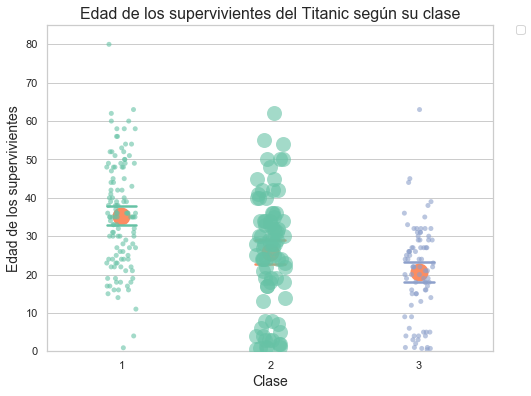

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv("C:\\Users\\David\\Desktop\\Pias\\titanic.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de scatter plot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, s=5, alpha=0.6)

# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='k', markers='o', join=False, ax=ax, ci=None, scale=1.5)

# Cambiar el color de los puntos de la media para que coincidan con el scatterplot
colors = sns.color_palette('Set2')
for i, point in enumerate(ax.collections):
    if i%2 != 0:
        point.set_color(colors[i//2])
        point.set_sizes([225])

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color=colors[i])
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color=colors[i])

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Establecer el fondo blanco
ax.set_facecolor('white')

# Mostrar el gráfico
plt.show()


No handles with labels found to put in legend.


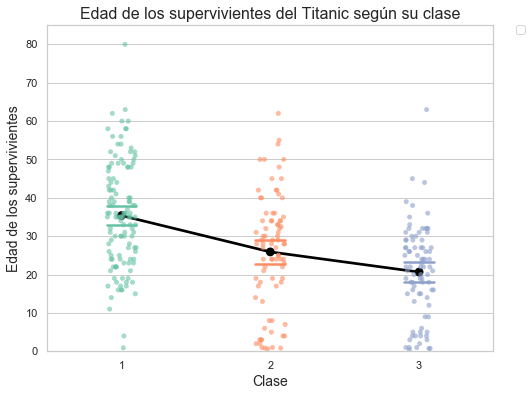

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv("C:\\Users\\David\\Desktop\\Pias\\titanic.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de scatter plot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, s=5, alpha=0.6)

# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='black', markers='o', s=100, ax=ax, ci=None)

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color=sns.color_palette("Set2")[i])
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color=sns.color_palette("Set2")[i])

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Mostrar el gráfico
plt.show()


No handles with labels found to put in legend.


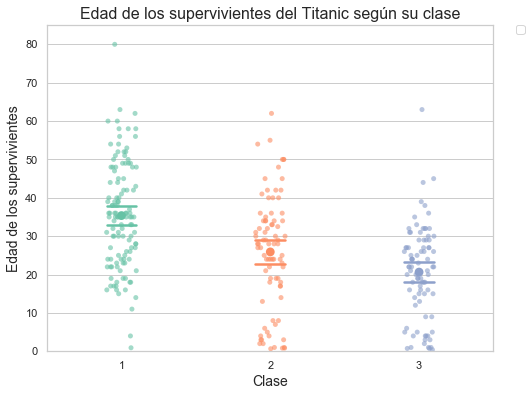

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv("C:\\Users\\David\\Desktop\\Pias\\titanic.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de scatter plot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, s=5, alpha=0.6)

# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='black', markersize=15, ax=ax, ci=None, join=False, palette='Set2')

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Configurar el fondo de la gráfica como blanco
sns.set_style("whitegrid")

# Mostrar el gráfico
plt.show()


No handles with labels found to put in legend.


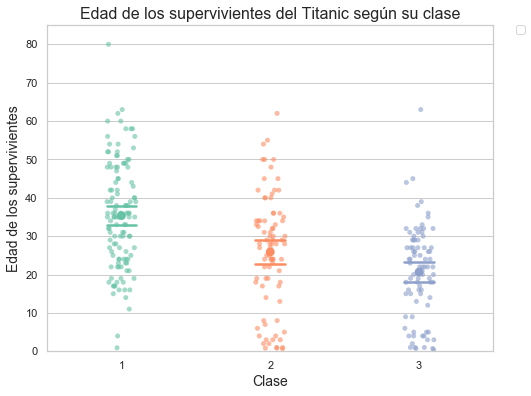

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv("C:\\Users\\David\\Desktop\\Pias\\titanic.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de scatter plot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, s=5, alpha=0.6)

# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='black', markersize=15, ax=ax, ci=None, join=False, palette='Set2')

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Configurar el fondo de la gráfica como blanco
sns.set_style("white")

# Mostrar el gráfico
plt.show()


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: Unknown property fill

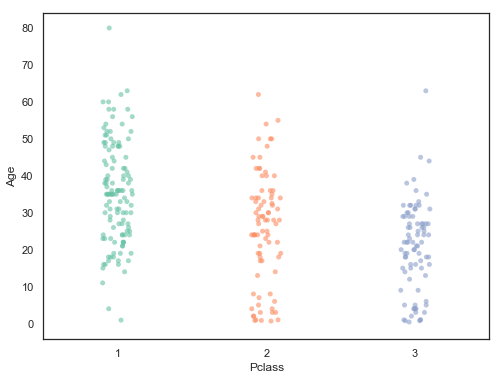

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv("C:\\Users\\David\\Desktop\\Pias\\titanic.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de stripplot y sinaplot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, s=5, alpha=0.6)

for i, label in enumerate(class_ci.index):
    class_data = survived_by_class[survived_by_class['Pclass'] == label]['Age']
    sns.kdeplot(class_data, ax=ax, color=sns.color_palette('Set2')[i], fill=True, alpha=0.3)
    sns.stripplot(x=[i]*len(class_data), y=class_data, ax=ax, jitter=True, s=5, color=sns.color_palette('Set2')[i])

    ci = class_ci.loc[label]
    ax.plot([i - 0.1, i + 0.1], [class_data.mean() + ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])
    ax.plot([i - 0.1, i + 0.1], [class_data.mean() - ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Configurar el fondo de la gráfica como blanco
sns.set_style("white")

# Mostrar el gráfico
plt.show()


No handles with labels found to put in legend.


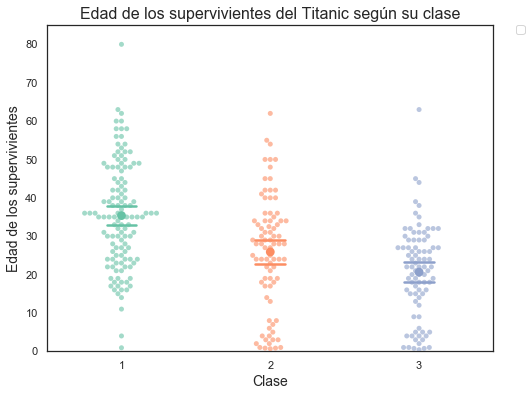

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv("C:\\Users\\David\\Desktop\\Pias\\titanic.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de sinaplot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))
sns.swarmplot(data=survived_by_class, x='Pclass', y='Age', palette='Set2', ax=ax, size=5, alpha=0.6)

# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='black', markersize=15, ax=ax, ci=None, join=False, palette='Set2')

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Configurar el fondo de la gráfica como blanco
sns.set_style("white")

# Mostrar el gráfico
plt.show()


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


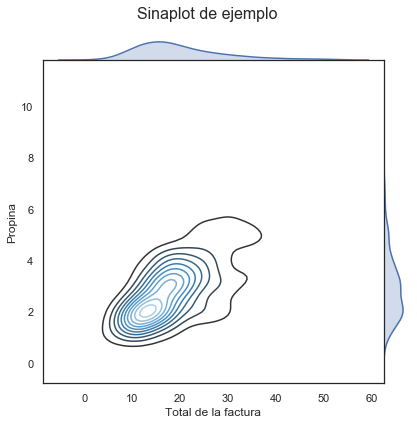

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos de ejemplo
tips = sns.load_dataset("tips")

# Crear sinaplot
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.JointGrid(x="total_bill", y="tip", data=tips, space=0, ratio=17)

g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.kdeplot, shade=True)

# Agregar títulos y etiquetas de ejes
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sinaplot de ejemplo', fontsize=16)
g.set_axis_labels("Total de la factura", "Propina")

plt.show()


In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sinaplot(x, y, bw='scott', cut=0, scale='area', color='blue', alpha=0.7, ax=None):
    """
    Función que crea un Sinaplot a partir de los datos de entrada x e y.
    x: Array unidimensional con los valores de la variable independiente.
    y: Array unidimensional con los valores de la variable dependiente.
    bw: Ancho de banda de la función de densidad de kernel. Puede ser un float o una cadena.
    cut: Porcentaje de los valores más extremos que se recortarán. Un número entre 0 y 1.
    scale: Escala utilizada para normalizar los Sinaplots. Puede ser 'area', 'count' o 'width'.
    color: Color de los Sinaplots.
    alpha: Transparencia de los Sinaplots.
    ax: Objeto Axes de Matplotlib en el que se dibujará el gráfico. Si es None, se creará uno nuevo.

    Retorna el objeto Axes de Matplotlib que contiene el gráfico.
    """
    if ax is None:
        ax = plt.gca()

    # Calcular la densidad de kernel de los datos
    kde = sns.kdeplot(y, bw=bw, cut=cut, color=color, alpha=alpha)

    # Escalar los Sinaplots según la opción elegida
    if scale == 'area':
        norm_factor = kde.integrate_box(0, 1)  # Área total del gráfico
    elif scale == 'count':
        norm_factor = len(x) / 10  # Asumiendo que cada Sinaplot tiene un ancho de 0.1
    elif scale == 'width':
        norm_factor = 1  # Los Sinaplots ya están escalados por su ancho

    # Calcular los Sinaplots
    for i, x_val in enumerate(np.unique(x)):
        subset = y[x == x_val]
        density = sns.kdeplot(subset, bw=bw, cut=cut, color=color, alpha=alpha, ax=ax)

        # Escalar los Sinaplots
        if scale != 'width':
            norm_area = density.integrate_box(0, 1) / norm_factor
            norm_factor = density.integrate_box(0, 1)  # Actualizar el factor de normalización
        else:
            norm_area = 1

        # Calcular la posición de cada Sinaplot
        pos = i + 0.5 - 0.5 * len(np.unique(x))

        # Dibujar los Sinaplots
        density.fill_betweenx(density.lines[0].get_ydata(), pos - density.lines[0].get_xdata() / norm_area,
                              pos + density.lines[0].get_xdata() / norm_area, alpha=alpha, color=color)

    # Configurar los ejes
    ax.set_xlim([-0.5, len(np.unique(x)) - 0.5])
    ax.set_ylim([np.min(y), np.max(y)])

    return ax


In [50]:
x = survived_by_class.groupby('Pclass').get_group(1).Age

1      38.0
3      35.0
11     58.0
23     28.0
31      NaN
       ... 
862    48.0
871    47.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 136, dtype: float64

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: 'AxesSubplot' object has no attribute 'integrate_box'

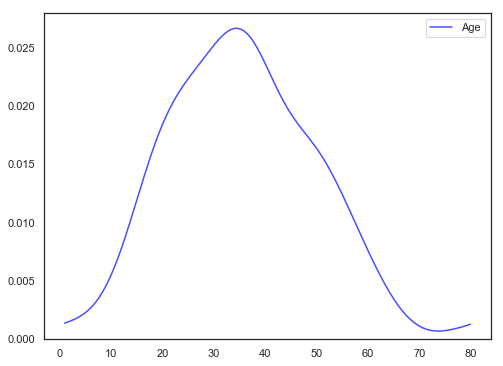

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos del Titanic y guardarlos en df
df = pd.read_csv("C:\\Users\\David\\Desktop\\Pias\\titanic.csv")

# Filtrar los supervivientes por clase
survived_by_class = df[df['Survived'] == 1][['Age', 'Pclass']]

# Calcular los límites superior e inferior del intervalo de confianza del 95% para cada clase
class_ci = survived_by_class.groupby('Pclass')['Age'].apply(lambda x: x.mean() + 1.96 * x.sem() - x.mean())

# Crear una gráfica de sinaplot para mostrar los datos y los límites del intervalo de confianza
fig, ax = plt.subplots(figsize=(8, 6))


# Agregar la media de cada clase
sns.pointplot(data=survived_by_class, x='Pclass', y='Age', color='black', markersize=15, ax=ax, ci=None, join=False, palette='Set2')

# Agregar los límites del intervalo de confianza
for i, label in enumerate(class_ci.index):
    ci = class_ci.loc[label]
    x_pos = i
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() + ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])
    ax.plot([x_pos - 0.1, x_pos + 0.1], [survived_by_class[survived_by_class['Pclass'] == label]['Age'].mean() - ci] * 2, lw=2.5, color=sns.color_palette('Set2')[i])

# Etiquetar los ejes y agregar un título
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('Edad de los supervivientes', fontsize=14)
ax.set_title('Edad de los supervivientes del Titanic según su clase', fontsize=16)

# Ajustar los límites de los ejes x e y
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, survived_by_class['Age'].max() + 5])

# Mover la leyenda fuera del área de trazado de la gráfica de scatter plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Configurar el fondo de la gráfica como blanco
sns.set_style("white")

# Mostrar el gráfico
plt.show()


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: 'AxesSubplot' object has no attribute 'integrate_box'

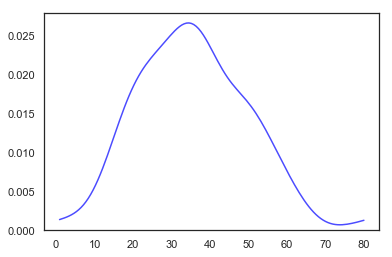

In [54]:
y1 = survived_by_class.groupby('Pclass').get_group(1).Age.values
sinaplot(0, y1, bw='scott', cut=0, scale='area', color='blue', alpha=0.7, ax=None)

In [55]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def sinaplot(x, y, bw='scott', cut=0, scale='area', color='blue', alpha=0.7, ax=None):
    """
    Crea un Sinaplot a partir de los datos de entrada x e y.
    
    x: Array unidimensional con los valores de la variable independiente.
    y: Array unidimensional con los valores de la variable dependiente.
    bw: Ancho de banda de la función de densidad de kernel. Puede ser un float o una cadena.
    cut: Porcentaje de los valores más extremos que se recortarán. Un número entre 0 y 1.
    scale: Escala utilizada para normalizar los Sinaplots. Puede ser 'area', 'count' o 'width'.
    color: Color de los Sinaplots.
    alpha: Transparencia de los Sinaplots.
    ax: Objeto Axes de Matplotlib en el que se dibujará el gráfico. Si es None, se creará uno nuevo.

    Retorna el objeto Axes de Matplotlib que contiene el gráfico.
    """
    if ax is None:
        ax = plt.gca()

    # Calcular la densidad de kernel de los datos
    kde = gaussian_kde(y, bw_method=bw)
    x_grid = np.linspace(np.min(y), np.max(y), 100)
    kde_values = kde.evaluate(x_grid)

    # Escalar los Sinaplots según la opción elegida
    if scale == 'area':
        norm_factor = np.sum(kde_values)  # Área total del gráfico
    elif scale == 'count':
        norm_factor = len(x) / 10  # Asumiendo que cada Sinaplot tiene un ancho de 0.1
    elif scale == 'width':
        norm_factor = 1  # Los Sinaplots ya están escalados por su ancho

    # Calcular los Sinaplots
    for i, x_val in enumerate(np.unique(x)):
        subset = y[x == x_val]
        subset_kde = gaussian_kde(subset, bw_method=bw)
        subset_kde_values = subset_kde.evaluate(x_grid)

        # Escalar los Sinaplots
        if scale != 'width':
            norm_area = np.sum(subset_kde_values) / norm_factor
            norm_factor = np.sum(subset_kde_values)  # Actualizar el factor de normalización
        else:
            norm_area = 1

        # Calcular la posición de cada Sinaplot
        pos = i + 0.5 - 0.5 * len(np.unique(x))

        # Dibujar los Sinaplots
        ax.fill_between(x_grid, pos - subset_kde_values / norm_area, pos, alpha=alpha, color=color)
        ax.fill_between(x_grid, pos + subset_kde_values / norm_area, pos, alpha=alpha, color=color)

    # Dibujar la línea de la función de densidad de kernel global
    ax.plot(x_grid, (kde_values / norm_factor) + np.max(ax.get_ylim()) * 0.01, color=color)

    # Configurar los ejes
    ax.set_xlim([np.min(y), np.max(y)])
    ax.set


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: 'AxesSubplot' object has no attribute 'integrate_box'

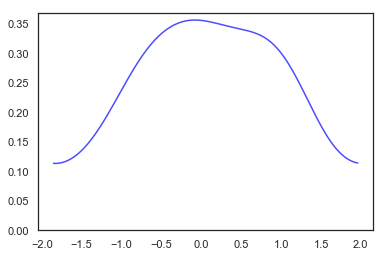

In [62]:
y1=np.random.randn(100)
sinaplot(0, y1, bw='scott', cut=0, scale='area', color='blue', alpha=0.7, ax=None)

In [ ]:
def sinaplot(x, y, bw='scott', cut=0, scale='area', color='blue', alpha=0.7, ax=None, point_size=5):
    """
    Función que crea un Sinaplot a partir de los datos de entrada x e y.
    x: Array unidimensional con los valores de la variable independiente.
    y: Array unidimensional con los valores de la variable dependiente.
    bw: Ancho de banda de la función de densidad de kernel. Puede ser un float o una cadena.
    cut: Porcentaje de los valores más extremos que se recortarán. Un número entre 0 y 1.
    scale: Escala utilizada para normalizar los Sinaplots. Puede ser 'area', 'count' o 'width'.
    color: Color de los Sinaplots.
    alpha: Transparencia de los Sinaplots.
    ax: Objeto Axes de Matplotlib en el que se dibujará el gráfico. Si es None, se creará uno nuevo.
    point_size: Tamaño de los puntos.

    Retorna el objeto Axes de Matplotlib que contiene el gráfico.
    """
    if ax is None:
        ax = plt.gca()

    # Calcular la densidad de kernel de los datos
    kde = sns.kdeplot(y, bw=bw, cut=cut, color=color, alpha=alpha)

    # Escalar los Sinaplots según la opción elegida
    if scale == 'area':
        norm_factor = kde.integrate_box(0, 1)  # Área total del gráfico
    elif scale == 'count':
        norm_factor = len(x) / 10  # Asumiendo que cada Sinaplot tiene un ancho de 0.1
    elif scale == 'width':
        norm_factor = 1  # Los Sinaplots ya están escalados por su ancho

    # Calcular los Sinaplots
    for i, x_val in enumerate(np.unique(x)):
        subset = y[x == x_val]

        # Escalar los Sinaplots
        if scale != 'width':
            norm_area = kde.evaluate(subset).sum() / norm_factor
            norm_factor = kde.evaluate(subset).sum()  # Actualizar el factor de normalización
        else:
            norm_area = 1

        # Calcular la posición de cada Sinaplot
        pos = i + 0.5 - 0.5 * len(np.unique(x))

        # Dibujar los puntos
        ax.scatter(np.repeat(pos, len(subset)), subset, s=point_size, alpha=alpha, color=color)

    # Configurar los ejes
    ax.set_xlim([-0.5, len(np.unique(x)) - 0.5])
    ax.set_ylim([np.min(y), np.max(y)])

    return ax


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: 'AxesSubplot' object has no attribute 'integrate_box'

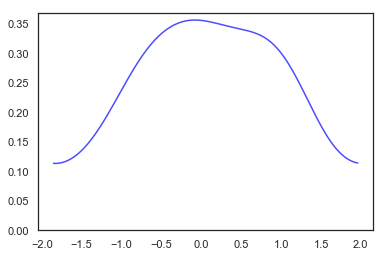

In [63]:
sinaplot(0, y1, bw='scott', cut=0, scale='area', color='blue', alpha=0.7, ax=None, point_size=5)